In [1]:
import os
os.chdir('/Users/tamarindo/Documents/School/Year3/Statistic/Project_midterm')
os.getcwd()

'/Users/tamarindo/Documents/School/Year3/Statistic/Project_midterm'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gender_df = pd.read_csv("worldbank_gender_2021.csv")
region_df = pd.read_excel("countries_regions.xlsx")

print("Gender dataset shape:", gender_df.shape)
print("Region dataset shape:", region_df.shape)

gender_df.head()

Gender dataset shape: (216, 196)
Region dataset shape: (217, 3)


,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",Gender Ratio Class
0,Afghanistan,2021,6.51,58.74,33.60,12.00,2099.0,125.67,5.20,114.32,...,5.308000e+09,43.16,60.87,12.79,NaN,NaN,NaN,NaN,NaN,1.0
1,Albania,2021,16.54,41.47,18.36,21.89,5144.7,114.68,NaN,104.92,...,7.718000e+09,62.89,27.58,15.96,NaN,NaN,NaN,NaN,NaN,1.0
2,Algeria,2021,NaN,17.35,11.23,3.16,1433.7,108.76,20.68,104.83,...,3.746600e+10,40.86,2.10,1.61,NaN,NaN,NaN,NaN,NaN,1.0
3,American Samoa,2021,NaN,14.50,NaN,4.85,NaN,NaN,NaN,NaN,...,8.840000e+08,159.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2021,NaN,39.91,0.53,1.59,NaN,NaN,NaN,NaN,...,1.563000e+09,51.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
region_df.head()

,CountryName,Region,ThirdWorld
0,Afghanistan,South Asia,Yes
1,Albania,Eastern Europe,No
2,Algeria,Africa,No
3,American Samoa,Australia and Oceanea,No
4,Andorra,Western Europe,No


In [ ]:
# EDA 

In [5]:
# Merge data set
df = gender_df.merge(
    region_df,
    left_on="Country Name",
    right_on="CountryName",
    how="left"
)

print("Merged dataset shape:", df.shape)
df[["Country Name", "Region", "ThirdWorld"]].head()

Merged dataset shape: (216, 199)


,Country Name,Region,ThirdWorld
0,Afghanistan,South Asia,Yes
1,Albania,Eastern Europe,No
2,Algeria,Africa,No
3,American Samoa,Australia and Oceanea,No
4,Andorra,Western Europe,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Columns: 199 entries, Country Name to ThirdWorld
dtypes: float64(194), int64(1), object(4)
memory usage: 335.9+ KB


In [8]:
# Check missing value
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio.head(15)

International tourism, expenditures (% of total imports)                                1.0
Repeaters, primary, female (% of female enrollment)                                     1.0
Fish species, threatened                                                                1.0
Bird species, threatened                                                                1.0
Population living in areas where elevation is below 5 meters (% of total population)    1.0
Lead time to import, median case (days)                                                 1.0
School enrollment, secondary (% net)                                                    1.0
School enrollment, primary (% net)                                                      1.0
International tourism, receipts (% of total exports)                                    1.0
Renewable electricity output (% of total electricity output)                            1.0
Repeaters, primary, male (% of male enrollment)                                 

In [9]:
# Drop columns with extreme misssing value
threshold = 0.7   # -> drop columns with >70% missing
cols_to_drop = missing_ratio[missing_ratio > threshold].index

df_reduced = df.drop(columns=cols_to_drop)

print("Columns before cleaning:", df.shape[1])
print("Columns after cleaning:", df_reduced.shape[1])

Columns before cleaning: 199
Columns after cleaning: 126


In [10]:
# Remove rows with missing target
target = "Gender Ratio Class"

df_reduced = df_reduced[~df_reduced[target].isnull()]

print("Final dataset shape:", df_reduced.shape)

Final dataset shape: (186, 126)


In [11]:
df_reduced.describe().T.head(15)

,count,mean,std,min,25%,50%,75%,max
Year,186.0,2.021000e+03,0.000000e+00,2021.00,2021.000,2021.000,2.021000e+03,2.021000e+03
Agricultural land (% of land area),185.0,3.885070e+01,2.195628e+01,0.50,19.890,40.280,5.471000e+01,8.189000e+01
"Agriculture, forestry, and fishing, value added (% of GDP)",173.0,1.034896e+01,1.011773e+01,0.03,2.240,7.150,1.555000e+01,5.745000e+01
Arable land (% of land area),185.0,1.469357e+01,1.389875e+01,0.13,4.120,10.990,2.189000e+01,6.230000e+01
Cereal yield (kg per hectare),174.0,3.860261e+03,3.479840e+03,16.30,1658.075,3120.400,5.124700e+03,3.040020e+04
Crop production index (2014-2016 = 100),183.0,1.085079e+02,1.976965e+01,53.89,97.300,105.130,1.171650e+02,1.980700e+02
Fertilizer consumption (kilograms per hectare of arable land),177.0,1.626268e+02,2.758739e+02,0.01,20.680,98.080,1.772500e+02,2.146250e+03
Food production index (2014-2016 = 100),183.0,1.089571e+02,1.716930e+01,65.74,100.225,106.130,1.174100e+02,1.799100e+02
Forest area (% of land area),184.0,3.181310e+01,2.345342e+01,0.00,11.390,31.125,4.871500e+01,9.733000e+01
Forest area (sq. km),184.0,2.186054e+05,8.018824e+05,0.00,5070.875,27254.435,1.264917e+05,8.153116e+06


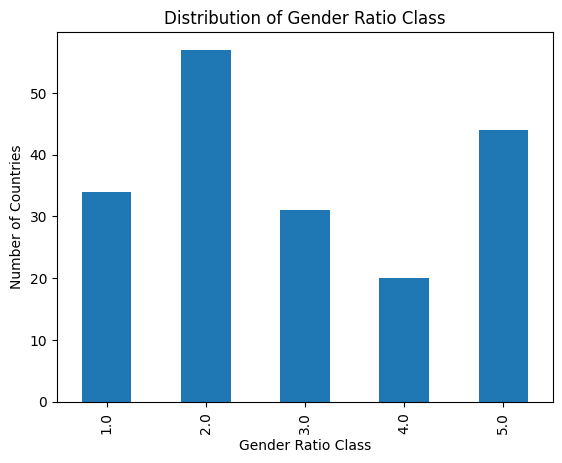

In [12]:
plt.figure()
df_reduced[target].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Gender Ratio Class")
plt.xlabel("Gender Ratio Class")
plt.ylabel("Number of Countries")
plt.show()

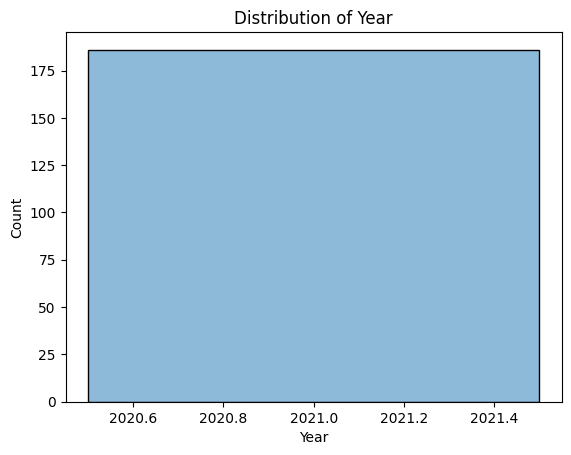

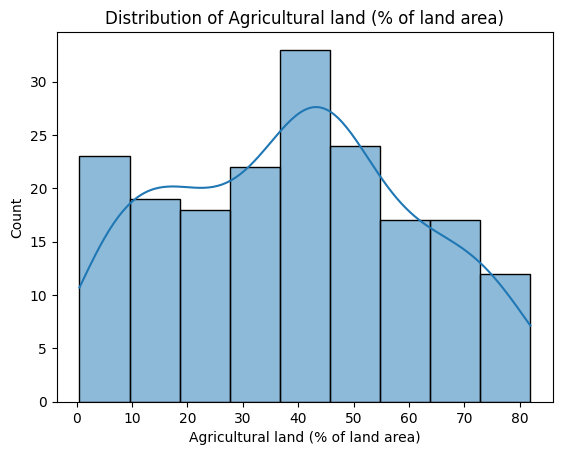

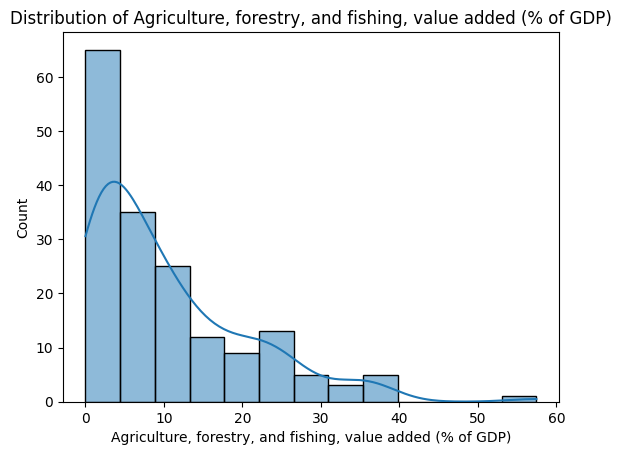

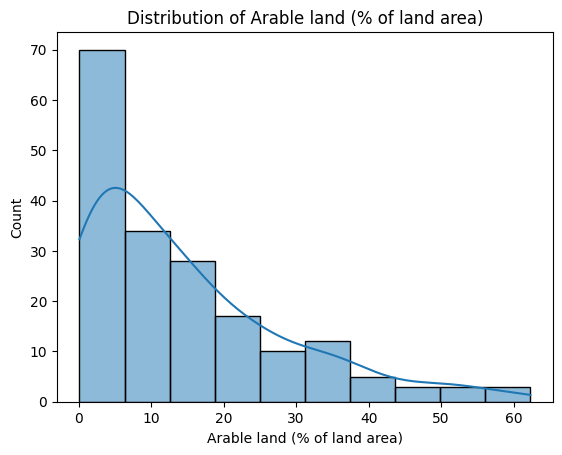

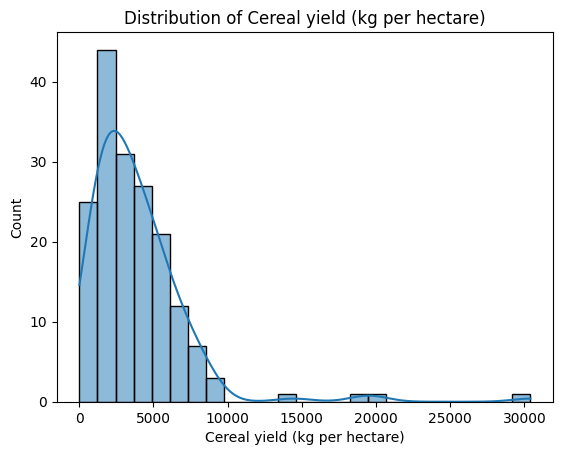

In [13]:
sample_features = df_reduced.select_dtypes(include=np.number).columns[:5]

for col in sample_features:
    plt.figure()
    sns.histplot(df_reduced[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [14]:
# Check class distribution
pd.crosstab(df_reduced["Region"], df_reduced[target])

Gender Ratio Class,1.0,2.0,3.0,4.0,5.0
Region,,,,,
Africa,17,12,9,3,11
Australia and Oceanea,1,2,0,4,4
East Asia,1,3,1,0,2
Eastern Europe,2,11,2,0,1
Middle East,2,2,2,1,9
North America,2,9,3,1,6
Northern Europe,0,2,2,3,3
South America,0,4,4,4,0
South Asia,5,3,0,0,0


In [ ]:
# Modeling

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [26]:
df = gender_df.merge(
    region_df,
    left_on="Country Name",
    right_on="CountryName",
    how="left"
)

missing_ratio = df.isnull().mean()
df = df.drop(columns=missing_ratio[missing_ratio > 0.7].index)

target = "Gender Ratio Class"
df = df[~df[target].isnull()]

In [27]:
X = df.drop(columns=[target, "Country Name", "CountryName"])
X = X.select_dtypes(include=np.number)

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cm = confusion_matrix(y_test, y_pred)
    return acc, f1, cm

Workflow 1 - Logistic Regression
Accuracy: 0.21052631578947367
F1 (macro): 0.17461685823754788
Confusion Matrix:
 [[0 4 2 1 0]
 [2 4 3 1 2]
 [0 4 0 1 1]
 [0 1 1 1 1]
 [1 4 0 1 3]]


/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


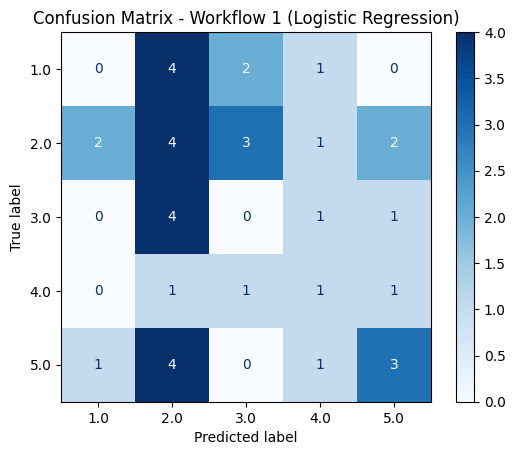

In [29]:
# Workflow 1 -> Baseline
workflow1 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        random_state=42
    ))
])

workflow1.fit(X_train, y_train)

y_pred1 = workflow1.predict(X_test)

acc1 = accuracy_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1, average="macro")
cm1 = confusion_matrix(y_test, y_pred1)

print("Workflow 1 - Logistic Regression")
print("Accuracy:", acc1)
print("F1 (macro):", f11)
print("Confusion Matrix:\n", cm1)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred1,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix - Workflow 1 (Logistic Regression)")
plt.show()

Workflow 2 - SVM + Feature Selection
Accuracy: 0.3684210526315789
F1 (macro): 0.2803030303030303
Confusion Matrix:
 [[4 3 0 0 0]
 [2 8 1 0 1]
 [0 4 1 0 1]
 [0 1 0 0 3]
 [2 5 0 1 1]]


/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


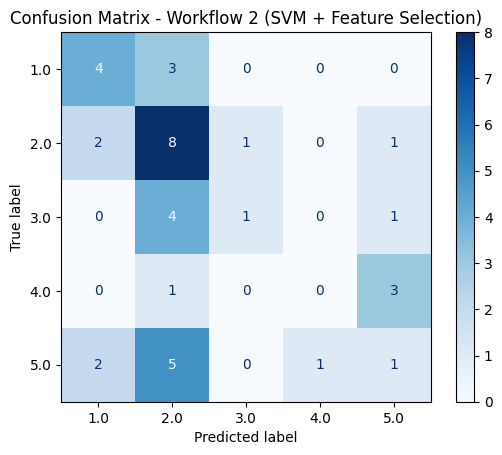

In [30]:
workflow2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(score_func=f_classif, k=30)),
    ("model", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        random_state=42
    ))
])

workflow2.fit(X_train, y_train)

y_pred2 = workflow2.predict(X_test)

acc2 = accuracy_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2, average="macro")
cm2 = confusion_matrix(y_test, y_pred2)

print("Workflow 2 - SVM + Feature Selection")
print("Accuracy:", acc2)
print("F1 (macro):", f12)
print("Confusion Matrix:\n", cm2)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred2,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix - Workflow 2 (SVM + Feature Selection)")
plt.show()

Workflow 3 - Random Forest
Accuracy: 0.4473684210526316
F1 (macro): 0.34767025089605735
Confusion Matrix:
 [[3 4 0 0 0]
 [1 8 1 0 2]
 [0 3 1 0 2]
 [0 1 1 0 2]
 [1 3 0 0 5]]


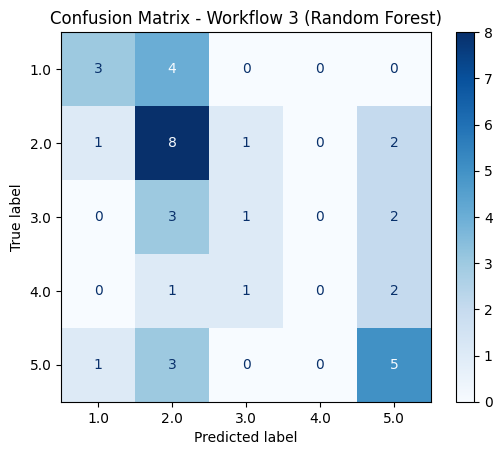

In [31]:
# Workflow 3 -> Tree based model
workflow3 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ))
])

workflow3.fit(X_train, y_train)

y_pred3 = workflow3.predict(X_test)

acc3 = accuracy_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3, average="macro")
cm3 = confusion_matrix(y_test, y_pred3)

print("Workflow 3 - Random Forest")
print("Accuracy:", acc3)
print("F1 (macro):", f13)
print("Confusion Matrix:\n", cm3)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred3,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix - Workflow 3 (Random Forest)")
plt.show()

In [34]:
# Result 
results = pd.DataFrame({
    "Workflow": [
        "Logistic Regression",
        "SVM + Feature Selection",
        "Random Forest"
    ],
    "Accuracy": [acc1, acc2, acc3],
    "F1_macro": [f11, f12, f13]
})

results

,Workflow,Accuracy,F1_macro
0,Logistic Regression,0.210526,0.174617
1,SVM + Feature Selection,0.368421,0.280303
2,Random Forest,0.447368,0.347670


Final Model Performance (Random Forest)
Accuracy (macro): 0.4473684210526316
F1-score (macro): 0.34767025089605735
Confusion Matrix:
 [[3 4 0 0 0]
 [1 8 1 0 2]
 [0 3 1 0 2]
 [0 1 1 0 2]
 [1 3 0 0 5]]


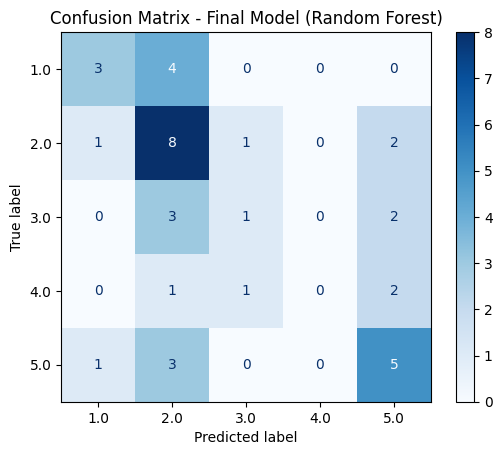

In [35]:
# Performance Matric
y_pred_final = workflow3.predict(X_test)

acc_final = accuracy_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final, average="macro")
cm_final = confusion_matrix(y_test, y_pred_final)

print("Final Model Performance (Random Forest)")
print("Accuracy (macro):", acc_final)
print("F1-score (macro):", f1_final)
print("Confusion Matrix:\n", cm_final)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_final,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix - Final Model (Random Forest)")
plt.show()

In [36]:
# Feature importance from Random forest
feature_importance = workflow3.named_steps["model"].feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)

,Feature,Importance
13,Rural population,0.022754
48,Price level ratio of PPP conversion factor (GD...,0.016341
107,Proportion of seats held by women in national ...,0.015378
33,External debt stocks (% of GNI),0.015301
44,Medium and high-tech manufacturing value added...,0.015185
37,"GNI per capita, PPP (current international $)",0.014960
2,"Agriculture, forestry, and fishing, value adde...",0.014125
4,Cereal yield (kg per hectare),0.013719
89,"Life expectancy at birth, male (years)",0.013618
9,Forest area (sq. km),0.013378


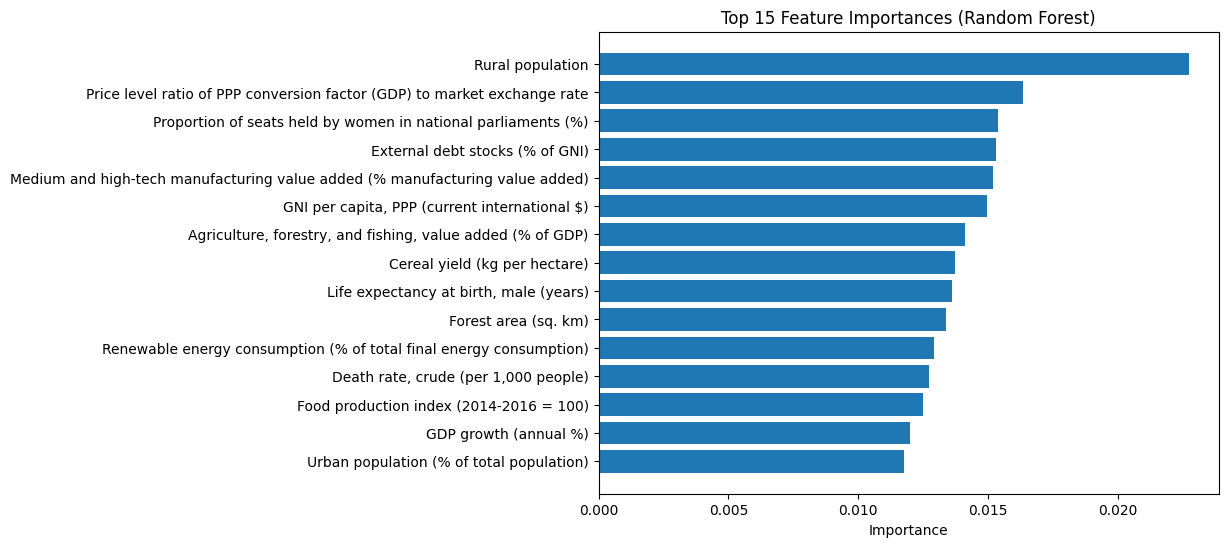

In [37]:
plt.figure(figsize=(8,6))
plt.barh(
    importance_df["Feature"].head(15)[::-1],
    importance_df["Importance"].head(15)[::-1]
)
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

In [ ]:
# ANOVA

In [40]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [41]:
anova_data = df[["Region", target]].dropna()

groups = [
    anova_data[anova_data["Region"] == region][target]
    for region in anova_data["Region"].unique()
]

anova_result = f_oneway(*groups)

anova_result

F_onewayResult(statistic=np.float64(3.6806823456231963), pvalue=np.float64(6.1523662505875e-05))

In [42]:
contingency_table = pd.crosstab(df["Region"], df[target])

contingency_table

Gender Ratio Class,1.0,2.0,3.0,4.0,5.0
Region,,,,,
Africa,17,12,9,3,11
Australia and Oceanea,1,2,0,4,4
East Asia,1,3,1,0,2
Eastern Europe,2,11,2,0,1
Middle East,2,2,2,1,9
North America,2,9,3,1,6
Northern Europe,0,2,2,3,3
South America,0,4,4,4,0
South Asia,5,3,0,0,0


In [44]:
# Chi square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

Chi-square statistic: 98.37309709634914
p-value: 2.5094422769798516e-05
Degrees of freedom: 48
